In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Mon May 10 06:40:02 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----

In [ ]:
%cd gdrive/My\ Drive/Qual/pytorch
!pwd

/content/gdrive/My Drive/Qual/pytorch
/content/gdrive/My Drive/Qual/pytorch


In [ ]:
!python3 main.py --source_domain SVHN --target_domain USPS  --save_dir ./SVHN_USPS  --max_epoch 30

Using downloaded and verified file: ./data/SVHN/train_32x32.mat
Using downloaded and verified file: ./data/SVHN/extra_32x32.mat
tcmalloc: large alloc 1631641600 bytes == 0x5565d5c46000 @  0x7f5623e651e7 0x5565c25f2e68 0x5565c25bd637 0x7f55a5fd33fa 0x7f55a61f6973 0x7f55a61fb0bd 0x7f55a61fe8ee 0x7f55a62065c0 0x7f55a61f85f5 0x5565c25c0cc0 0x5565c26b1fed 0x5565c2634988 0x5565c262f4ae 0x5565c25c23ea 0x5565c263060e 0x5565c262f4ae 0x5565c25c23ea 0x5565c263060e 0x5565c262f4ae 0x5565c25c23ea 0x5565c26347f0 0x5565c262f7ad 0x5565c25c2c9f 0x5565c2603d79 0x5565c2600cc4 0x5565c25c1559 0x5565c26354f8 0x5565c25c230a 0x5565c26347f0 0x5565c25c230a 0x5565c26303b5
Using downloaded and verified file: ./data/SVHN/test_32x32.mat
Epoch: 0

Source Accuracy: 44867.0/604388 (7.4235%)
Target Accuracy: 573.0/7291 (7.8590%)
Domain Accuracy: 10974.0/611679 (1.7941%)

Epoch: 1

Source Accuracy: 103747.0/604388 (17.1656%)
Target Accuracy: 1000.0/7291 (13.7155%)
Domain Accuracy: 72011.0/611679 (11.7727%)

Epoch: 2

Sou

tensor(0)
tensor(0)
tensor(2)
tensor(6)
tensor(6)
tensor(2)
tensor(1)
tensor(8)
tensor(6)
tensor(0)


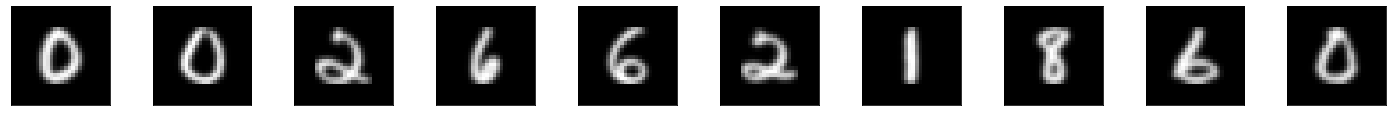

In [ ]:
### USPS Dataset Visualization
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from train import params

import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([
    transforms.Pad(6),
    transforms.ToTensor(),
    transforms.Normalize(mean= params.dataset_mean[0], std= params.dataset_std[0])
])   # pad 6 on all borders 16x16 --> 28x28

data = datasets.USPS(root= params.mnist_path, train= True, transform= transform,
                      download= True)

dataloader = DataLoader(dataset= data, batch_size= params.batch_size, shuffle= True)

%matplotlib inline
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(10):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    dataiter = iter(dataloader)
    images, labels = dataiter.next()
    images = images.numpy() # convert images to numpy for display
    plt.imshow(images[0][0],cmap=plt.cm.gray)
    print(labels[0])

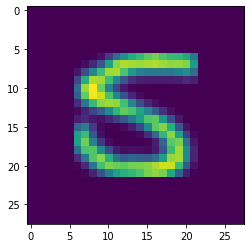

-1.0 0.7647059 tensor(5) (28, 28) tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000],
        [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, 

In [ ]:
%matplotlib inline
dataiter = iter(dataloader)
images, labels = dataiter.next()
plt.imshow(images[0][0].numpy())
plt.show()
print(np.min(images[0][0].numpy()),np.max(images[0][0].numpy()), labels[0], images[0][0].numpy().shape, images[0][0],) 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary


# Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 48, kernel_size=5)
        # self.conv1 = nn.Conv2d(3, 64, kernel_size= 5)
        # self.bn1 = nn.BatchNorm2d(64)
        # self.conv2 = nn.Conv2d(64, 50, kernel_size= 5)
        # self.bn2 = nn.BatchNorm2d(50)
        self.conv2_drop = nn.Dropout2d()

    def forward(self, input):
        input = input.expand(input.data.shape[0], 3, 28, 28)
        # x = F.relu(F.max_pool2d(self.bn1(self.conv1(input)), 2))
        # x = F.relu(F.max_pool2d(self.conv2_drop(self.bn2(self.conv2(x))), 2))
        # x = x.view(-1, 50 * 4 * 4)
        x = F.relu(F.max_pool2d(self.conv1(input), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 48 * 4 * 4)

        return x
cnn = CNN().cuda()
summary(cnn, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 24, 24]           2,432
            Conv2d-2             [-1, 48, 8, 8]          38,448
         Dropout2d-3             [-1, 48, 8, 8]               0
Total params: 40,880
Trainable params: 40,880
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.19
Params size (MB): 0.16
Estimated Total Size (MB): 0.35
----------------------------------------------------------------


In [ ]:
t = torch.rand(4, 4)
t.view(-1,16)

tensor([[0.0219, 0.6614, 0.7018, 0.8005, 0.0654, 0.5898, 0.5992, 0.4116, 0.4492,
         0.9272, 0.3334, 0.8276, 0.1838, 0.7555, 0.7390, 0.5192]])